### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA     #For ARIMA model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf    #For AutoCorrelation Function 

### Data Collection and Pre-Processing

In [2]:
data = pd.read_csv('AAPL.csv')

In [3]:
data.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [5]:
data.head()

,Unnamed: 0,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,,
2015-05-27 00:00:00+00:00,0,AAPL,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
2015-05-28 00:00:00+00:00,1,AAPL,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2015-05-29 00:00:00+00:00,2,AAPL,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
2015-06-01 00:00:00+00:00,3,AAPL,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
2015-06-02 00:00:00+00:00,4,AAPL,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [6]:
data.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-05-27 00:00:00+00:00 to 2020-05-22 00:00:00+00:00
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(1)
memory usage: 147.4+ KB


In [8]:
data.shape

(1258, 14)

In [9]:
data.isnull().sum()

Unnamed: 0     0
symbol         0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [10]:
close_prices = data['close']    #For forecasting

### Visualization

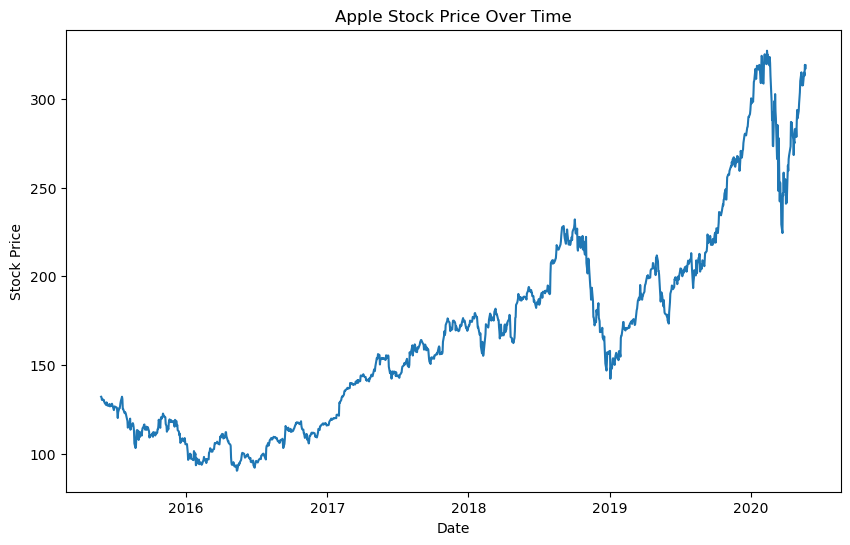

In [11]:
#Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(data['close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Apple Stock Price Over Time')
plt.show()

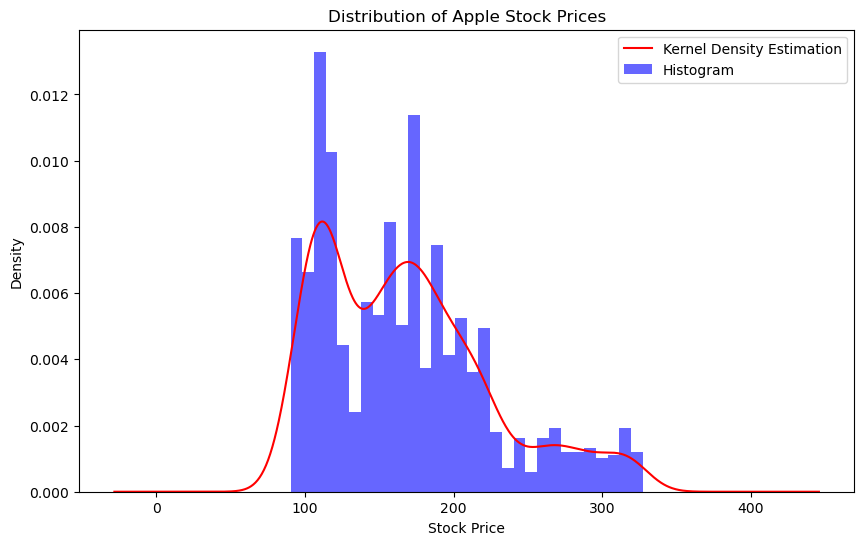

In [12]:
# Histogram and density plot
plt.figure(figsize=(10, 6))
plt.hist(data['close'], bins=30, density=True, alpha=0.6, color='blue')
data['close'].plot(kind='kde', color='red')
plt.xlabel('Stock Price')
plt.ylabel('Density')
plt.title('Distribution of Apple Stock Prices')
plt.legend(['Kernel Density Estimation', 'Histogram'])
plt.show()

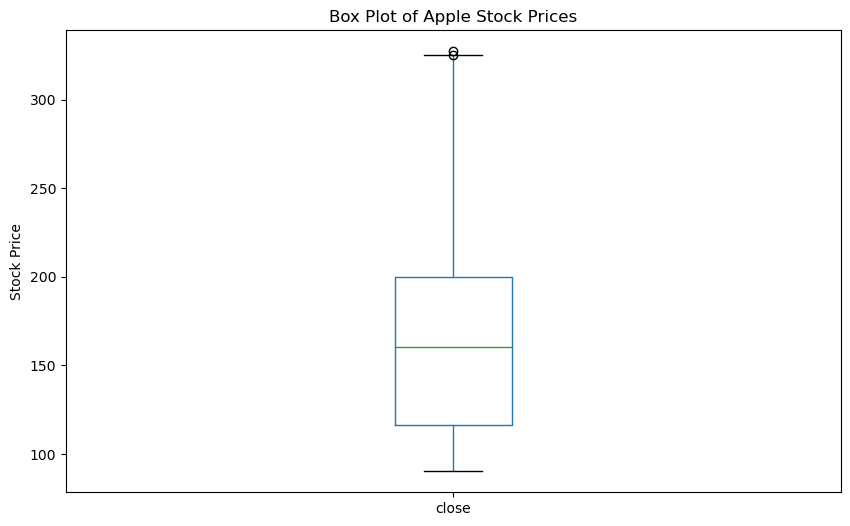

In [13]:
#BoxPlot
plt.figure(figsize=(10, 6))
data.boxplot(column='close', grid=False)
plt.ylabel('Stock Price')
plt.title('Box Plot of Apple Stock Prices')
plt.show()

<Figure size 500x200 with 0 Axes>

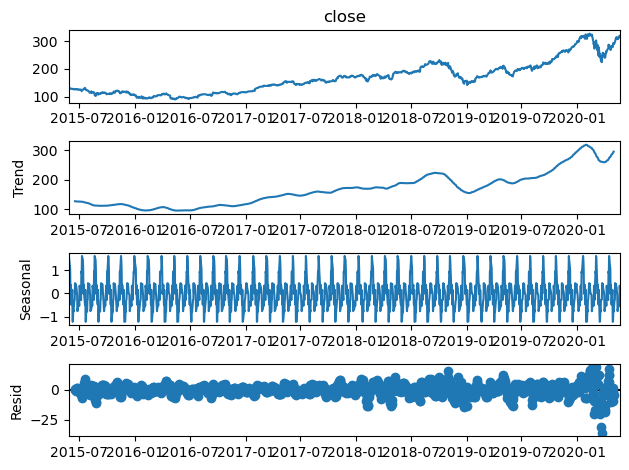

In [14]:
#Seasonal decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(5, 2))
decomposition = seasonal_decompose(data['close'], model='additive', period=30)  # Adjust period as needed
decomposition.plot()
plt.show()

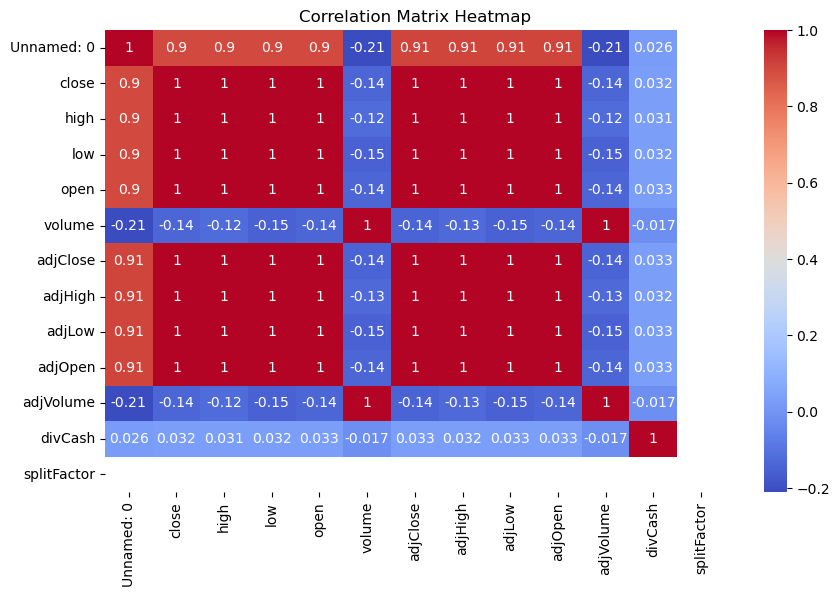

In [15]:
#Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

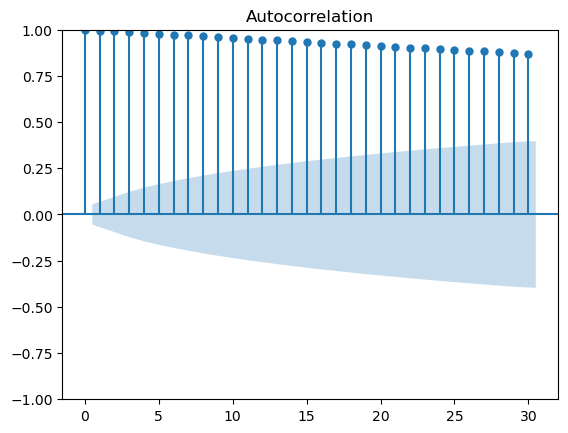

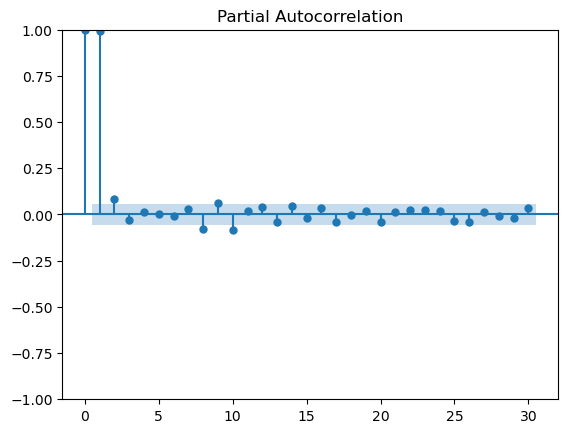

In [16]:
# Checking stationarity using ACF and PACF plots
plot_acf(close_prices, lags=30)
plot_pacf(close_prices, lags=30,method='ywm')
plt.show()

### Stationarity Check

In [17]:
# Differencing to achieve stationarity
close_prices_diff = close_prices.diff().dropna()
print(close_prices_diff)

date
2015-05-28 00:00:00+00:00   -0.265
2015-05-29 00:00:00+00:00   -1.500
2015-06-01 00:00:00+00:00    0.255
2015-06-02 00:00:00+00:00   -0.575
2015-06-03 00:00:00+00:00    0.160
                             ...  
2020-05-18 00:00:00+00:00    7.250
2020-05-19 00:00:00+00:00   -1.820
2020-05-20 00:00:00+00:00    6.090
2020-05-21 00:00:00+00:00   -2.380
2020-05-22 00:00:00+00:00    2.040
Name: close, Length: 1257, dtype: float64


### Model Selection, Fitting, and Validation

In [18]:
# Split data into training and test sets
train_size = int(len(close_prices_diff) * 0.8)
train_data, test_data = close_prices_diff[:train_size], close_prices_diff[train_size:]

In [29]:
# Build and fit the ARIMA model
order = (20, 1, 20)  # Order of ARIMA(p,d,q)
model = ARIMA(train_data, order=order)
model_fit = model.fit()

C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

### Forecasting

In [30]:
# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test_data))

C:\Users\PIYUSH GUPTA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [31]:
# Invert differencing to get actual predictions
predicted_prices = close_prices[train_size] + np.cumsum(predictions)

In [32]:
print(predicted_prices)

1005    179.447069
1006    179.268660
1007    181.016524
1008    180.221477
1009    181.544589
           ...    
1252    191.345475
1253    191.446353
1254    191.534537
1255    191.384839
1256    191.662643
Name: predicted_mean, Length: 252, dtype: float64


### Interpretation

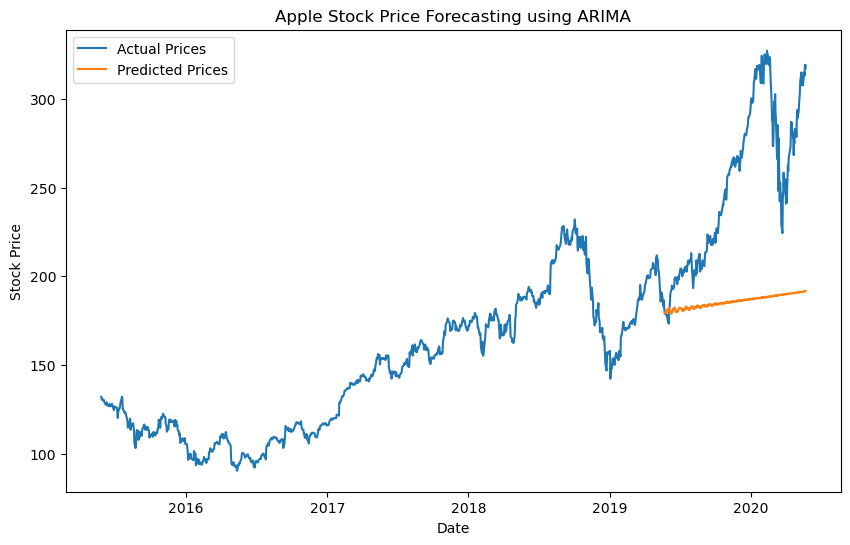

In [33]:
# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(close_prices, label='Actual Prices')
plt.plot(close_prices.index[train_size+1:], predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Apple Stock Price Forecasting using ARIMA')
plt.legend()
plt.show()